## Importing important libraries

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import os
from IPython.display import Image
from matplotlib.pyplot import imread, imshow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split

## Import datas and visualize

In [2]:
labeled_data = pd.read_csv('DogBreed/labels.csv')
labeled_data.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

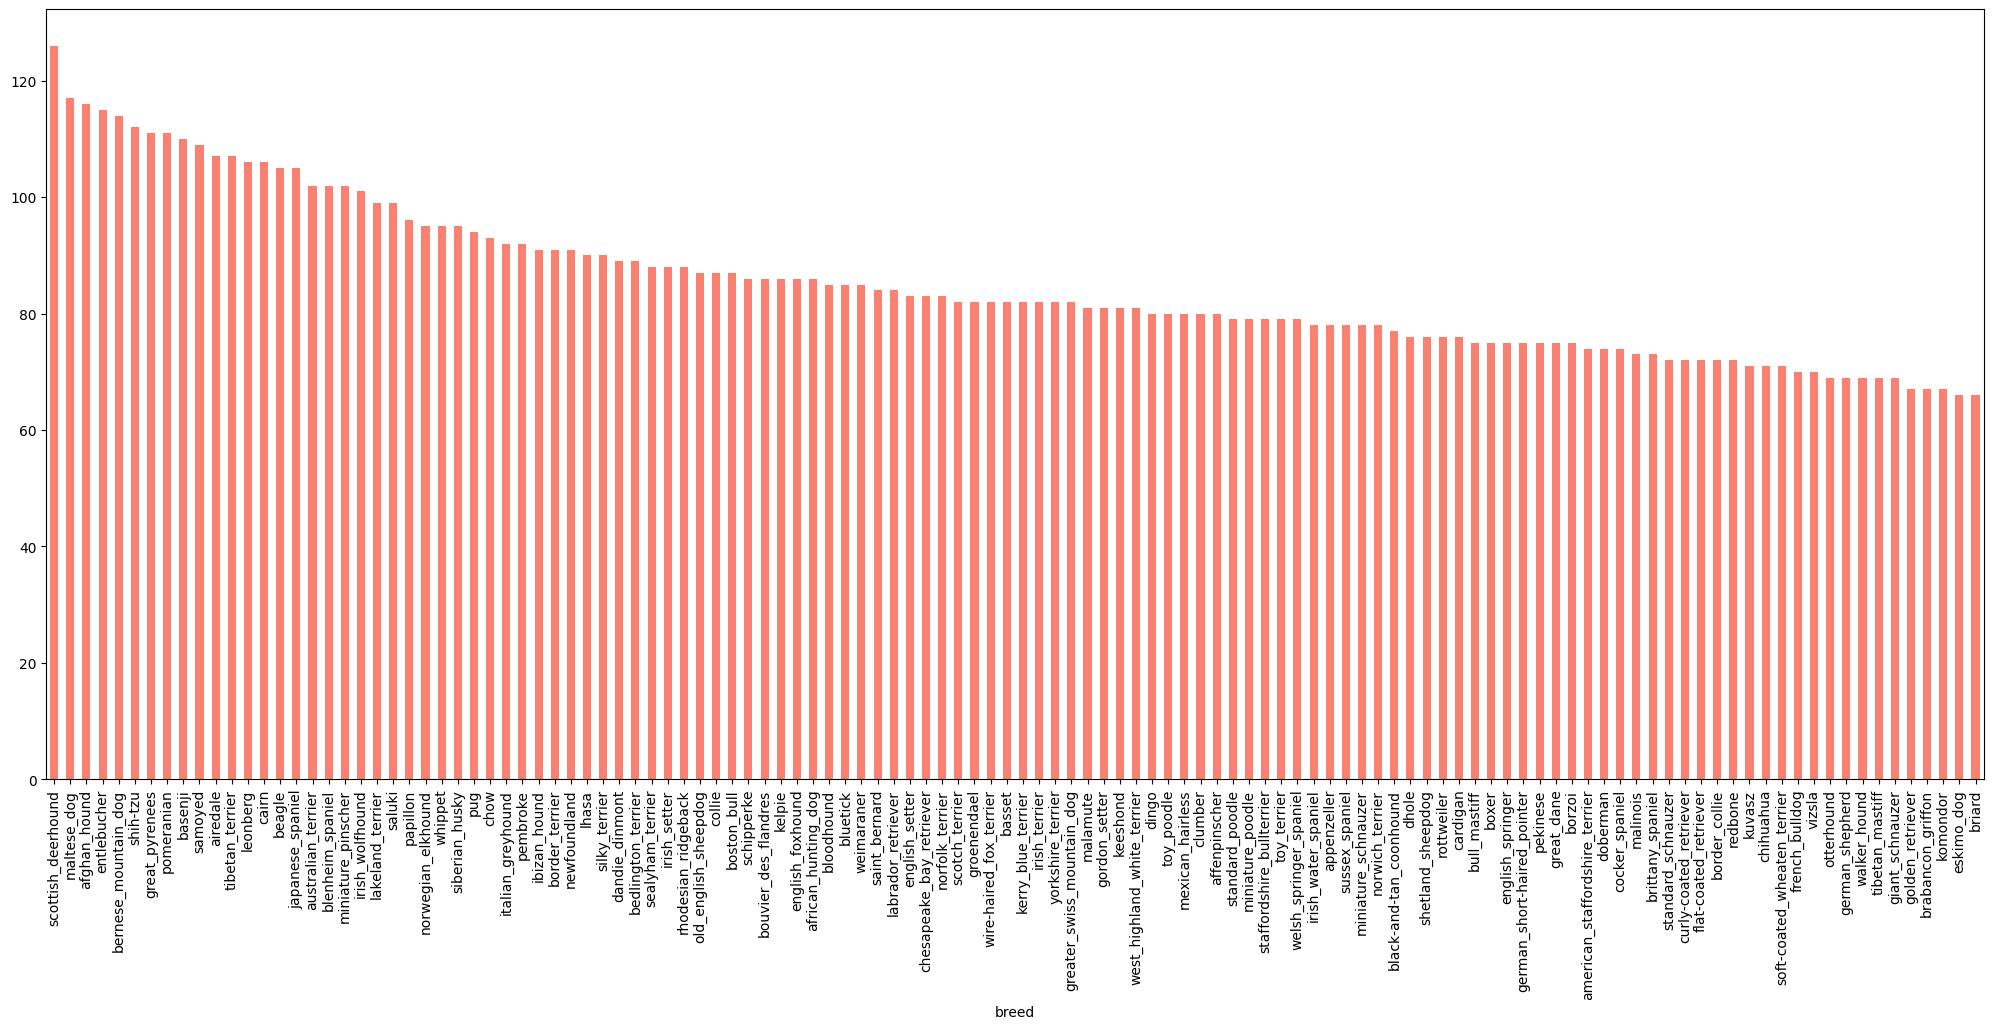

In [3]:
labeled_data.breed.value_counts().plot.bar(figsize=(25, 10), color='salmon');

## Importing images:
* Using IPython

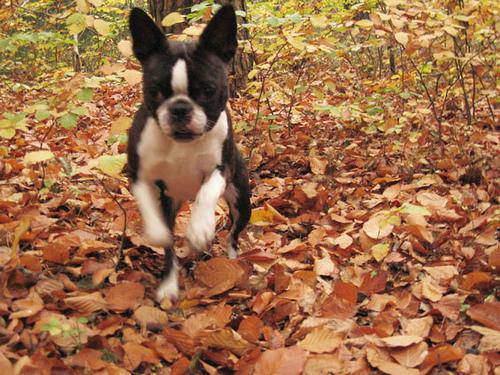

In [4]:
img_ipy = Image('DogBreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg')
img_ipy

* Using matplotlib

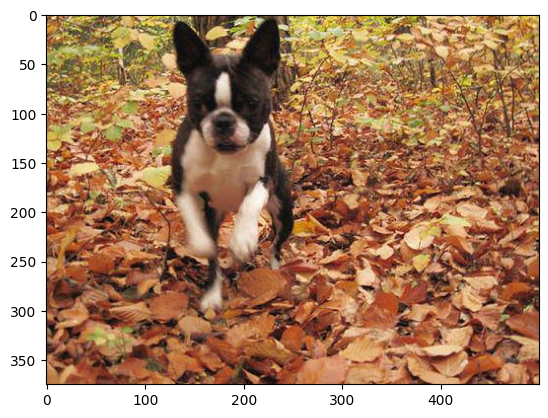

In [5]:
img_mat = imread('DogBreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg')
plt.imshow(img_mat)

**Let's extract other images from training folder**

In [6]:
filename = ['DogBreed/train/'+fname+'.jpg' for fname in labeled_data.id]
filename[:5]

['DogBreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'DogBreed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'DogBreed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'DogBreed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'DogBreed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

**Print list of images using IPython**

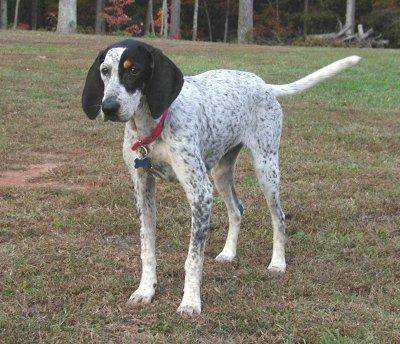

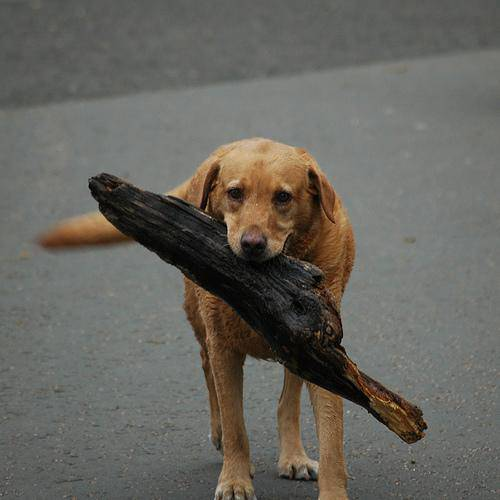

In [7]:
for img in filename[3:5]:
    display(Image(img))

**Printing list of images using matplotlib**

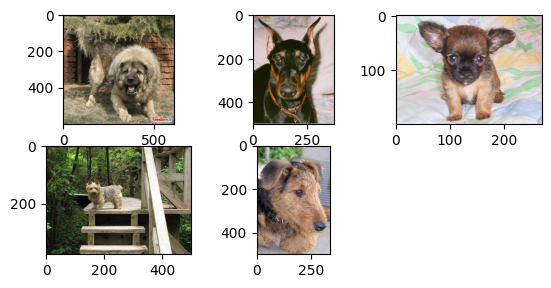

In [8]:
for i, img in enumerate(filename[9000:9005]):
    plt.subplot(3, 3, i+1)
    image = imread(img)
    plt.imshow(image)

## Checking images filename length and image list

In [9]:
if len(os.listdir('DogBreed/train'))==len(filename):
    print('Equal!!')
else:
    print('Not Equal!!')

Equal!!


**Manipulating the unique breeds**

In [10]:
labels = labeled_data.breed.to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [11]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

## Change the images label to boolean label

In [12]:
boolean_breeds = [label ==unique_breeds for label in labels]
boolean_breeds[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

**Printing out the labels**

In [13]:
print(labels[0])
print(np.where(labels[0]==unique_breeds))
print(boolean_breeds[0].argmax())
print(boolean_breeds[0].astype('int'))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Changing images into tensors
* `image` from following script returns the all pixels of the image

In [14]:
image = imread(filename[42])
image.shape
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [15]:
print('Available GPU: ', tf.config.list_physical_devices('GPU'))

Available GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
tf.constant(image)

2025-02-16 16:06:56.989242: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-16 16:06:56.989272: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-16 16:06:56.989283: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-16 16:06:56.989335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-16 16:06:56.989359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

## Splitting the data

In [17]:
X = filename
y = boolean_breeds

**Splitting into training and validation set**

In [18]:
NUMBER_IMAGES = 1000
X_train, X_val, y_train, y_val = train_test_split(X[:NUMBER_IMAGES], 
                                                  y[:NUMBER_IMAGES], 
                                                  test_size=0.2)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [19]:
X_train[:2], y_train[:2]

(['DogBreed/train/1006967db8c3d015cb0d272c4ae623a5.jpg',
  'DogBreed/train/08af52c888b0f5735c3ced810771601d.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False

## Preprocessing Images (Turning into Tensors)
* Tensors are the numerical representation like metrics
* What we are going to do is
  * Take an image filepath as input
  * Use TensorFlow to read the file and save it to a variable `image`
  * Turn our `image` (a jpg) into Tensors
  * Resize the `image` to be a shape of (224, 224)
  * Return the modified image

In [20]:
image = tf.io.read_file(filename[30]) # Reads the image file in string format
image = tf.image.decode_jpeg(image, channels=3) # Decodes read file into pixels
image = tf.image.convert_image_dtype(image, dtype=tf.float32) # Convert 0-255 pixel value to 0-1 (normalization)
image = tf.image.resize(image, size=[224, 224]) # Resize the image pixel to (224, 224) which is standard for tensorflow
image


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.66276264, 0.4549195 , 0.29805675],
        [0.6548845 , 0.44704136, 0.2901786 ],
        [0.64805675, 0.4441352 , 0.28727242],
        ...,
        [0.77139753, 0.67915314, 0.4206795 ],
        [0.75814086, 0.6619048 , 0.36789224],
        [0.7363795 , 0.66575634, 0.36185226]],

       [[0.6745974 , 0.46376052, 0.31288517],
        [0.6667192 , 0.4558824 , 0.305007  ],
        [0.6569678 , 0.45304626, 0.2991772 ],
        ...,
        [0.79346985, 0.70122546, 0.44275188],
        [0.78174037, 0.68251055, 0.39602232],
        [0.7674766 , 0.6893558 , 0.3914391 ]],

       [[0.6853642 , 0.4735995 , 0.32457986],
        [0.677486  , 0.46572134, 0.3167017 ],
        [0.67029303, 0.46637148, 0.3134303 ],
        ...,
        [0.79159915, 0.69560814, 0.4447301 ],
        [0.7943692 , 0.6884869 , 0.41115203],
        [0.7691917 , 0.68359995, 0.406032  ]],

       ...,

       [[0.28382754, 0.21217144, 0.07419859],
        [0.31

## Create a function that reads image, decode, and resizes (Pre-Process)

In [21]:
IMAGE_SIZE = 224
def process_image(image_path, image_size = IMAGE_SIZE):
    '''
    Takes an image file path and turns the image into a Tensor
    '''
    # Read in/out iamge file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 color (Red, Blue, Greed)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the color channel values from 0-255 to 0-1 values (Normalization)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # Resize the image to our desired value (224, 224)
    image = tf.image.resize(image, size=[image_size, image_size])
    return image

**Lets create another function that gets the image along with its label**

In [22]:
def get_image_label(image_path, label):
    """
    Takes an image file path name and associated label, preprocesses the image and returns a tuple of (image, label)
    """
    image = process_image(image_path)
    return image, label

In [23]:
(get_image_label(filename[30], tf.constant(boolean_breeds[30])))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.66276264, 0.4549195 , 0.29805675],
         [0.6548845 , 0.44704136, 0.2901786 ],
         [0.64805675, 0.4441352 , 0.28727242],
         ...,
         [0.77139753, 0.67915314, 0.4206795 ],
         [0.75814086, 0.6619048 , 0.36789224],
         [0.7363795 , 0.66575634, 0.36185226]],
 
        [[0.6745974 , 0.46376052, 0.31288517],
         [0.6667192 , 0.4558824 , 0.305007  ],
         [0.6569678 , 0.45304626, 0.2991772 ],
         ...,
         [0.79346985, 0.70122546, 0.44275188],
         [0.78174037, 0.68251055, 0.39602232],
         [0.7674766 , 0.6893558 , 0.3914391 ]],
 
        [[0.6853642 , 0.4735995 , 0.32457986],
         [0.677486  , 0.46572134, 0.3167017 ],
         [0.67029303, 0.46637148, 0.3134303 ],
         ...,
         [0.79159915, 0.69560814, 0.4447301 ],
         [0.7943692 , 0.6884869 , 0.41115203],
         [0.7691917 , 0.68359995, 0.406032  ]],
 
        ...,
 
        [[0.28382754, 0.21217144

## Turning our data into batches: default=32
Why turn our data into batches:
* If we try to fit large data (images) in one go, they all might not fit into memory
* We can manually adjust batch size (32 by default: 32 images in one batch)
**We need to pass 32 batches ta once that contains `32 images and 32 labels`**

In [24]:
BATCH_SIZE = 32
def create_data_batches(X, y=None, valid_data=False, test_data=False, batch_size = BATCH_SIZE):
    """
    Creates a batches of data out of image X and label y pairs. 
    Shuffles the data if its training data but doesn't shuffle if its validation data. 
    Also accepts the test data as input (no labels).
    """
    if test_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        process_data = data.map(process_image)
        data_batch = process_data.batch(batch_size)
        return data_batch
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        # Shuffle training data
        data = data.shuffle(buffer_size=len(X))
        process_data = data.map(get_image_label)
        data_batch = process_data.batch(batch_size)
        return data_batch

**Create training batches**

In [25]:
train_batches = create_data_batches(X_train, y_train)
train_batches.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

**Create validation batches**

In [26]:
valid_batches = create_data_batches(X_val, y_val, valid_data=True)
valid_batches.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

**Finding the length of train and validation batch**
* Each batch consist 32 images and train data has 800 images (80% of 1000 subset images) making total 25 batches: 25*32 = 800
* Validation batch has 200 total images and each batch has 32 images making: 6*32+1*8 = 192+8 = 200 (8 images in final batch)

In [27]:
len(train_batches), len(valid_batches)

(25, 7)

## Visualize the images using `matplotlib` library

In [28]:
def show_25_images(images, label):
    plt.figure(figsize=(12, 10))
    # To show only 25 images
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[label[i].argmax()])
        plt.axis('off')

**Getting the batch in the form numpy array**
* `train_batches` has both images and labels and `.as_numpy_iterator()` gets images and labels
* `next` will fetch the next batch which are in the form of tuples

In [29]:
train_data, train_label = next(train_batches.as_numpy_iterator())

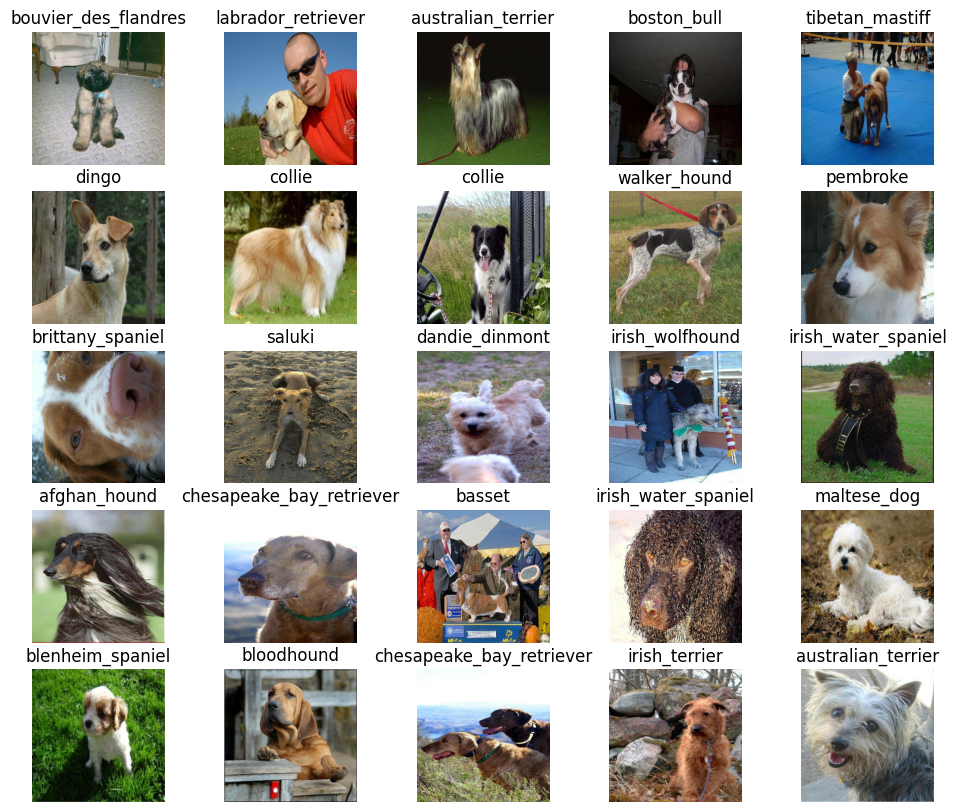

In [30]:
# Shows all the images and labels which are resized in 224*224 pixel size
train_data_25 = show_25_images(train_data, train_label)
train_data_25

**To visualize validation images we have to first extract data in the form of iterator**

In [31]:
valid_data, valid_label = next(valid_batches.as_numpy_iterator())

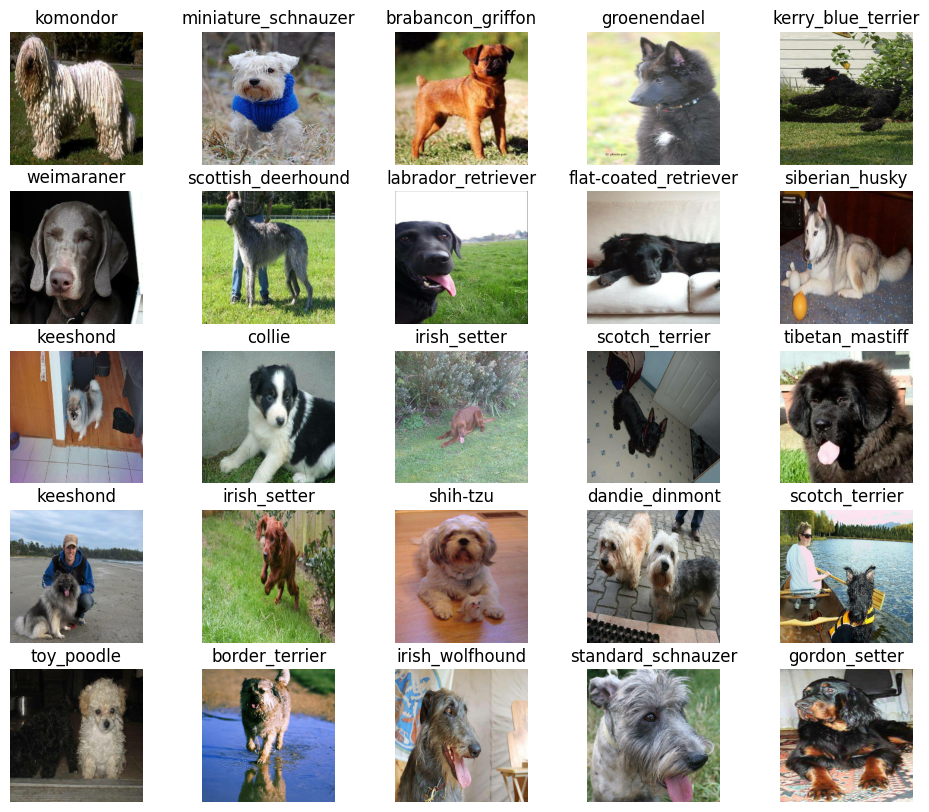

In [32]:
validation_images_25 = show_25_images(valid_data, valid_label)
validation_images_25

## Model Building (Transfer Learning
Uses already trained models as its impossible to train deep learning models that require high GPU

**Following are some CNN (Convolution Neural Network) models that can be used**
  * ResNet (Residual Networks) – ResNet-50, ResNet-101, ResNet-152
  * DenseNet – DenseNet-121, DenseNet-169, DenseNet-201
  * EfficientNet – EfficientNet-B0 to B7 (More efficient than MobileNet)
  * InceptionNet – Inception-v3, Inception-ResNet
  * Xception – An extension of Inception
  * MobileNet – MobileNetV1, MobileNetV2, MobileNetV3 (optimized for mobile devices)
  * NASNet – NASNetMobile, NASNetLarge (Neural Architecture Search Network)

**Let's define inputs and outputs for building model and create a function**

In [35]:
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # [batch, width, height, channels]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

def build_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print('Building model with: ', model_url)
    model = tf.keras.Sequential([hub.KerasLayer(model_url),
                                tf.keras.layers.Dense(units = output_shape, activation='softmax')])
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])
    model.build(input_shape)
    return model

In [36]:
model = build_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if model stops improving.

We'll create two callbacks, one for Tensorboard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback
Monitors training data, whether its going good or not, learning correctly or not.
1. Load the TensorBoard notebook extensions
2. Create a TensorBoard callback which is able to shape logs to a directory and pass it to our model `fit()` function.function
3. Visualize our models training logs with the `%tensorboard` magic function

In [37]:
%load_ext tensorboard

In [38]:
import datetime
def create_tensorboard_callback():
    # Create a folder in data location folder that can store logs generated during training
    logdir = os.path.join('DogBreed/log', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
1. Stops model training if model stops improving or model stops learning
2. Stops from overfitting if model trains for too long which might not do well on test sets or validation sets

In [39]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', 
                                                       patience = 3)

## Training a model (on a subset of data: 1000 images first out of 10000 images)

In [40]:
NUM_EPOCHS = 100

In [41]:
print('GPU', 'Available' if tf.config.list_physical_devices("GPU") else 'Not Available')

GPU Available


Let's create a function which trains a model.
* Create a model using `build_model()`
* Setup a TensorBoard callbacks using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing the training data, validation data, number of epochs to train for `NUM_EPOCHS` and the callbacks we'd like to use
* Return the model

In [46]:
# Build a function to train and return a trained model
def train_model():
    '''
    Trains a give model and returs the trained version.
    '''
    # Create a model
    model = build_model()
    
    # Create a new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to data passing it the callbacks we created
    model.fit(x = train_batches, 
              epochs = NUM_EPOCHS, 
              validation_data = valid_batches, 
              validation_freq = 1, 
              callbacks = [tensorboard, early_stop_callback])
    # Return fitted model
    return model

In [47]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Epoch 1/100


2025-02-16 16:11:45.307190: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


25/25 [==============================] - 6s 167ms/step - loss: 4.5611 - accuracy: 0.0938 - val_loss: 3.2784 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 4s 147ms/step - loss: 1.6628 - accuracy: 0.6612 - val_loss: 2.0385 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 4s 148ms/step - loss: 0.5641 - accuracy: 0.9463 - val_loss: 1.5739 - val_accuracy: 0.6400
Epoch 4/100
25/25 [==============================] - 4s 147ms/step - loss: 0.2469 - accuracy: 0.9925 - val_loss: 1.3939 - val_accuracy: 0.6750
Epoch 5/100
25/25 [==============================] - 4s 147ms/step - loss: 0.1416 - accuracy: 0.9987 - val_loss: 1.3286 - val_accuracy: 0.6900
Epoch 6/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0984 - accuracy: 0.9987 - val_loss: 1.3019 - val_accuracy: 0.6950
Epoch 7/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 1.2724 - val_accuracy: 0.6900
Epoch 8/100

**Checking TensorBoard logs**

In [48]:
%tensorboard --logdir DogBreed/log

Reusing TensorBoard on port 6006 (pid 4515), started 0:01:46 ago. (Use '!kill 4515' to kill it.)

## Making and evaluating predictions using a trained model

In [49]:
# Make prediction on the validation data
predictions = model.predict(valid_batches, verbose=True)
predictions

7/7 [==============================] - 1s 137ms/step


array([[1.9992527e-03, 2.9697074e-02, 5.5539194e-03, ..., 9.9314190e-04,
        3.1225738e-04, 5.7561481e-03],
       [6.9245417e-03, 1.3710238e-03, 3.6688941e-04, ..., 4.5682970e-04,
        9.9690519e-03, 1.9201398e-02],
       [3.5363477e-02, 1.2903321e-04, 7.0177164e-05, ..., 8.9179556e-04,
        8.0953643e-04, 4.8981421e-03],
       ...,
       [6.0116352e-05, 1.9210474e-05, 2.2761042e-05, ..., 1.3869153e-03,
        1.9922393e-06, 3.4730201e-06],
       [7.2631978e-05, 2.3982536e-04, 1.5892090e-05, ..., 2.3516655e-04,
        1.5476243e-04, 1.1832806e-05],
       [5.3283777e-05, 1.4474698e-04, 2.7290715e-02, ..., 4.6180788e-01,
        1.1425145e-03, 1.1500551e-04]], dtype=float32)

In [50]:
len(predictions)

200

In [51]:
predictions.shape

(200, 120)

**Predictions holds 120 label values which tells probability of each label name i.e. dog breed name for image at `predictions[0]` label**

In [52]:
predictions[0]

array([1.99925271e-03, 2.96970736e-02, 5.55391936e-03, 1.25982810e-03,
       2.66498741e-04, 9.28799715e-03, 9.80742043e-04, 9.38453188e-04,
       3.46568209e-04, 1.80918083e-03, 3.95843945e-03, 1.00716285e-03,
       4.08277352e-04, 8.26088537e-04, 8.05615447e-04, 1.82499969e-03,
       5.22533664e-04, 1.06076259e-04, 7.62743526e-04, 1.82869483e-03,
       3.84898670e-03, 3.31282470e-04, 8.47860356e-04, 1.92967970e-02,
       2.66360148e-04, 2.31041946e-03, 2.49337498e-03, 7.83689495e-04,
       6.99627795e-04, 2.09635997e-04, 1.58054684e-03, 2.63030380e-02,
       2.76357681e-03, 5.58018335e-04, 5.18502842e-04, 1.34988688e-03,
       3.24482709e-04, 7.78709131e-04, 4.24177619e-04, 5.09500795e-04,
       8.13029998e-04, 9.68870518e-05, 4.22474556e-03, 4.10763751e-04,
       2.33608618e-04, 8.12834245e-04, 8.32577585e-04, 1.54822646e-03,
       2.94864620e-03, 6.77014061e-04, 5.52316778e-04, 4.10413515e-04,
       3.14767094e-04, 7.65526958e-04, 1.59161154e-03, 4.66806872e-04,
      

**If we add all 120 values from `predictions[0]` it will be close to `1` as max probability is 1**

In [53]:
np.sum(predictions[0])

1.0

In [54]:
np.sum(predictions[119])

0.9999999

**First Prediction**

In [55]:
index = 42
print(predictions[index])
print(f'\nMax value (Probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Prediction label: {unique_breeds[np.argmax(predictions[index])]}')

[5.3572367e-05 2.0148877e-04 2.0894510e-04 4.9021677e-04 2.5110217e-04
 6.1193266e-04 6.9019057e-05 7.1295379e-03 7.1798742e-01 6.4483121e-02
 1.6655031e-04 1.0021258e-03 1.4918336e-03 2.8210173e-03 1.7064724e-02
 6.1045855e-04 2.3868402e-04 3.8937220e-04 7.2736919e-05 7.7375567e-05
 1.0354883e-04 4.9709628e-04 2.2119717e-04 1.9211468e-05 3.5726104e-02
 4.8188031e-05 1.3632490e-04 3.7691323e-05 2.1811038e-04 9.4836159e-04
 4.3104981e-05 2.8687532e-04 1.8345675e-04 6.3966692e-04 1.6309934e-04
 4.7880836e-05 6.9232454e-05 1.4027870e-04 1.2575689e-04 2.6168677e-04
 1.0574004e-03 2.1054011e-04 2.7478638e-04 3.0565949e-05 1.6202853e-04
 1.7576562e-03 1.6550457e-05 9.8012132e-04 3.5556150e-06 7.8928228e-03
 4.6000248e-03 4.7858466e-05 3.1518328e-03 9.1064241e-05 7.3989854e-06
 5.8550304e-05 2.4463246e-03 2.6111889e-03 8.6753265e-05 3.7990649e-06
 1.0103304e-03 4.2436560e-04 3.1577325e-05 5.5210345e-05 5.7164489e-05
 4.8490259e-05 3.5792873e-06 8.3966239e-04 1.3612042e-04 4.9667806e-06
 3.594

In [56]:
unique_breeds[28]

'chesapeake_bay_retriever'

## Create a function for prediction
**Note:** Prediction probabilities are also known as confidence levels

In [57]:
# Turn prediction probabilities into their respective label (Easier to understand)
def get_pred_label(prediction_probabilities):
    '''
    Turns an array of predictions into a label
    '''
    return unique_breeds[np.argmax(prediction_probabilities)]

In [58]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[42])
pred_label

'basset'

**Since our validation data are still in batch datasets, we have to unbatch those data into labels and images and evaluate predicted labels and actual labels**

In [78]:
images_ = []
labels_ = []
for image, label in valid_batches.unbatch().as_numpy_iterator():
    print(image)
    print(unique_breeds[np.argmax(label)])

[[[0.22916433 0.20171335 0.09975256]
  [0.27682364 0.23984009 0.14105682]
  [0.2597174  0.21363024 0.11833961]
  ...
  [0.19377775 0.15848362 0.02907186]
  [0.19516702 0.15987289 0.04614739]
  [0.15373823 0.11558181 0.01297332]]

 [[0.23941761 0.21128386 0.11137139]
  [0.22694856 0.18928225 0.0925473 ]
  [0.23948714 0.19295646 0.09947488]
  ...
  [0.18371528 0.14705563 0.01832662]
  [0.18875708 0.15209739 0.03905467]
  [0.15063867 0.1111167  0.00977878]]

 [[0.19811222 0.16673966 0.07654358]
  [0.21414581 0.17324068 0.08622212]
  [0.245733   0.19709854 0.11219833]
  ...
  [0.173254   0.13011675 0.00690246]
  [0.18490314 0.14176588 0.03196195]
  [0.13228238 0.0862828  0.00741481]]

 ...

 [[0.21396287 0.2453354  0.05594467]
  [0.1153685  0.14674105 0.00316886]
  [0.16956285 0.2009354  0.02298246]
  ...
  [0.22963974 0.26493385 0.09630639]
  [0.30256757 0.3378617  0.16923426]
  [0.19842358 0.23371771 0.06509024]]

 [[0.24178866 0.2731612  0.08100434]
  [0.18879597 0.22016852 0.03741631]


In [94]:
# Create a function to unbatch a batch dataset
def unbatch_data(dataset):
    images_ = []
    labels_ = []
    for img, lbl in dataset.unbatch().as_numpy_iterator():
        images_.append(img)
        labels_.append(unique_breeds[np.argmax(lbl)])
    return images_, labels_

In [95]:
val_images, val_labels = unbatch_data(valid_batches)

In [96]:
val_images[100], val_labels[100]

(array([[[0.05450833, 0.07411617, 0.04691056],
         [0.0932702 , 0.11287805, 0.08542707],
         [0.07992877, 0.09316406, 0.06439732],
         ...,
         [0.57414216, 0.5819853 , 0.66433823],
         [0.56801474, 0.5758579 , 0.6582108 ],
         [0.56188726, 0.5697304 , 0.65208334]],
 
        [[0.01025117, 0.02985902, 0.00551471],
         [0.03706971, 0.05667755, 0.03025073],
         [0.02317927, 0.03580647, 0.01385324],
         ...,
         [0.573118  , 0.5809611 , 0.66331404],
         [0.56801474, 0.5758579 , 0.6582108 ],
         [0.56188726, 0.5697304 , 0.65208334]],
 
        [[0.00943628, 0.02904412, 0.00796842],
         [0.02683824, 0.04644608, 0.02579712],
         [0.00405397, 0.01293385, 0.00101349],
         ...,
         [0.56952715, 0.5773703 , 0.6597232 ],
         [0.5663078 , 0.5741509 , 0.65650386],
         [0.5614072 , 0.56925035, 0.6516033 ]],
 
        ...,
 
        [[0.29244414, 0.25027585, 0.17099458],
         [0.24704278, 0.17047124, 0.10852

In [116]:
get_pred_label(val_labels[0]), get_pred_label(predictions[0])

('affenpinscher', 'komondor')

## Plot images and corresponding labels

In [107]:
def plot_pred(predicion_probabilities, labels, images, n=7):
    '''
    View the predicton, ground truth and image for sample n
    '''
    pred_prob, true_label, image = predicion_probabilities[n],  labels[n], images[n]

    # Get the pred labels
    pred_label = get_pred_label(pred_prob)

    # Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label==true_label:
        color = 'green'
    else:
        color = 'red'

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:.2f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                     color=color)

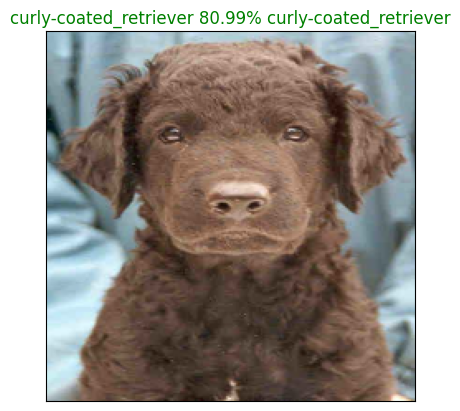

In [114]:
plot_pred(predicion_probabilities=predictions, 
          labels=val_labels, 
          images=val_images, 
          n=77)

## View top 10 predictions
* Prediction probabilities values
* Prediction probabilities values
* Prediction labels

In [143]:
def plot_pred_conf(predicton_probabilities, labels, n=1):
    '''
    Plus the top 10 highest prediction confidences along with the truth label for sample n
    '''
    pred_prob, true_label = predicton_probabilities[n], labels[n]

    # Get predicted labels
    pred_label = get_pred_label(pred_prob)

    # Finding top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Finding top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values, 
                       color='gray')
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation='vertical')
    # Change color of true labels
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
    else:
        pass

**Breakdown of above function**

In [144]:
print('One way to sort top 10 indexes: ', predictions[0].argsort()[::-1][:10])
print('Finding maximum value: ', predictions[0].max())
print('Prediction values: ', predictions[0][predictions[0].argsort()[-10:][::-1]])
print('Predicting top 10 labels: ', unique_breeds[predictions[0].argsort()[::-1][:10]])

One way to sort top 10 indexes:  [ 65 109  70   1  76  31  23  82  98  58]
Finding maximum value:  0.43387064
Prediction values:  [0.43387064 0.20011938 0.06613582 0.02969707 0.0274849  0.02630304
 0.0192968  0.01805837 0.01508275 0.01024499]
Predicting top 10 labels:  ['komondor' 'tibetan_terrier' 'lhasa' 'afghan_hound' 'miniature_poodle'
 'clumber' 'briard' 'old_english_sheepdog' 'sealyham_terrier'
 'irish_water_spaniel']


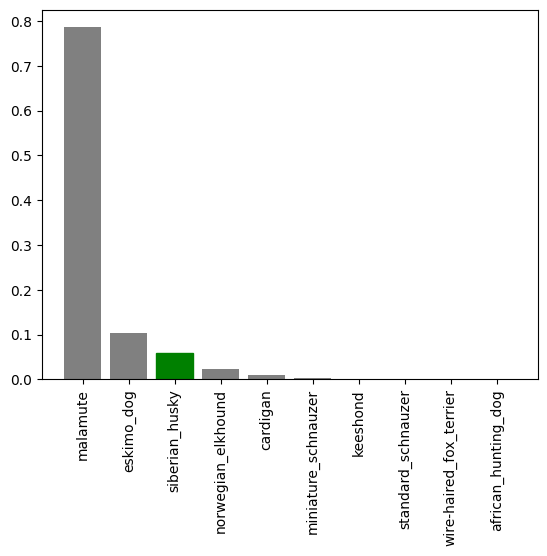

In [150]:
plot_pred_conf(predicton_probabilities=predictions,
               labels=val_labels,
               n=9)

## Combining images along with top 10 predictions chart

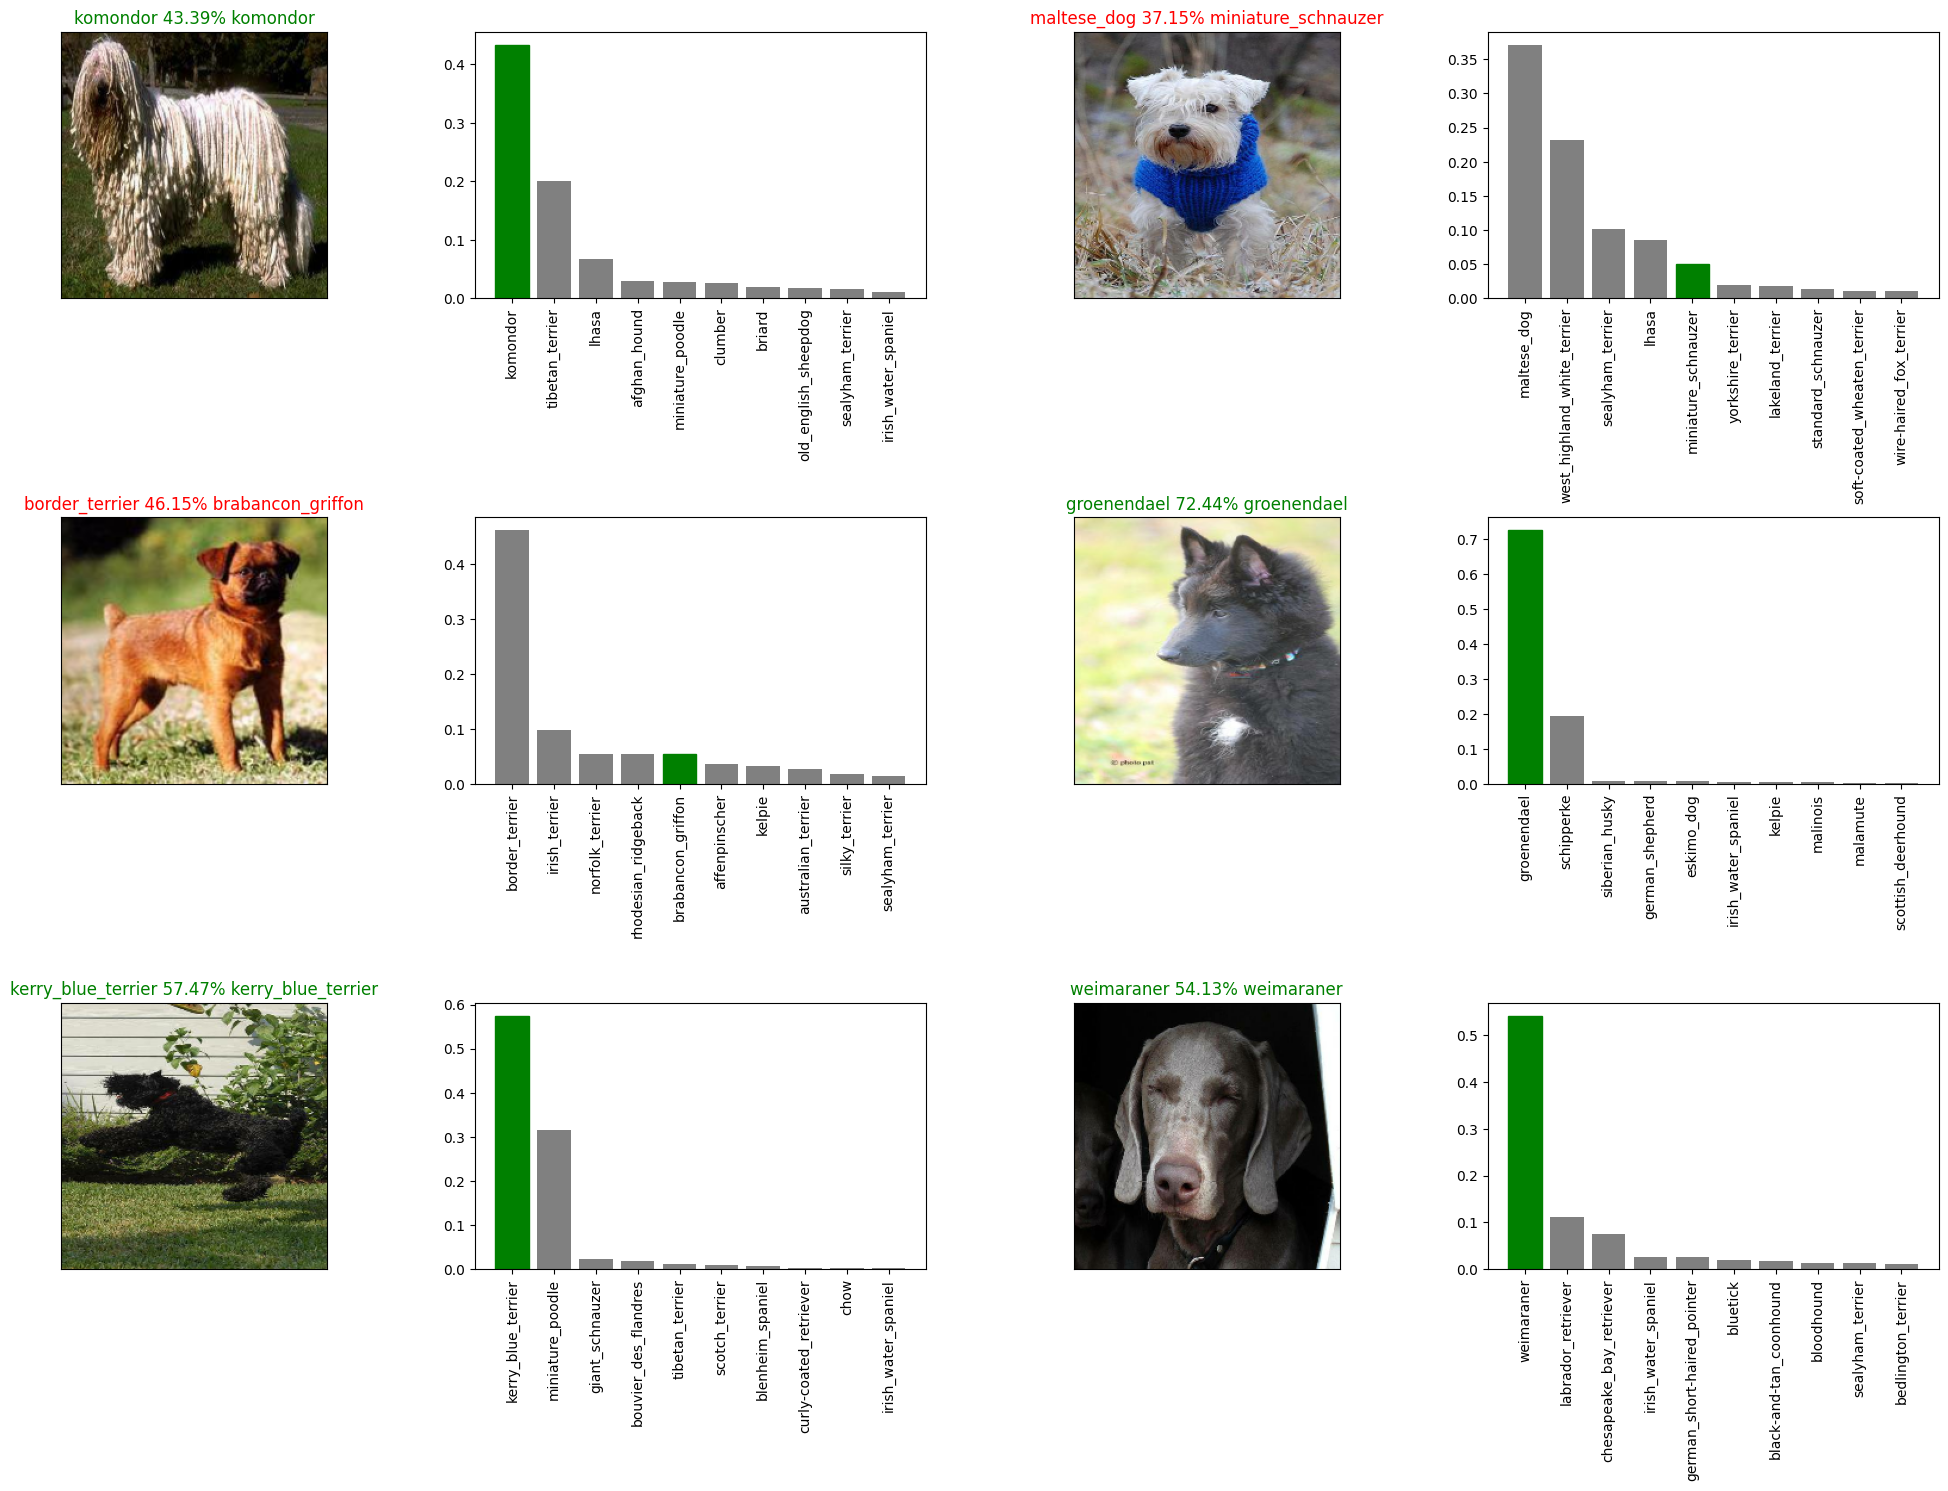

In [160]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_cols*num_rows
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(predicion_probabilities=predictions, 
              labels = val_labels, 
              images = val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(predicton_probabilities=predictions,
                   labels = val_labels,
                   n = i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Confusion matrix for multiclass dog image classification

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
y_pred = np.argmax(predictions, axis=1)
y_valid = np.argmax(y_val, axis=1)

/var/folders/tj/260lnk5505z6wf67xhl6yccw0000gn/T/ipykernel_4482/3790748283.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


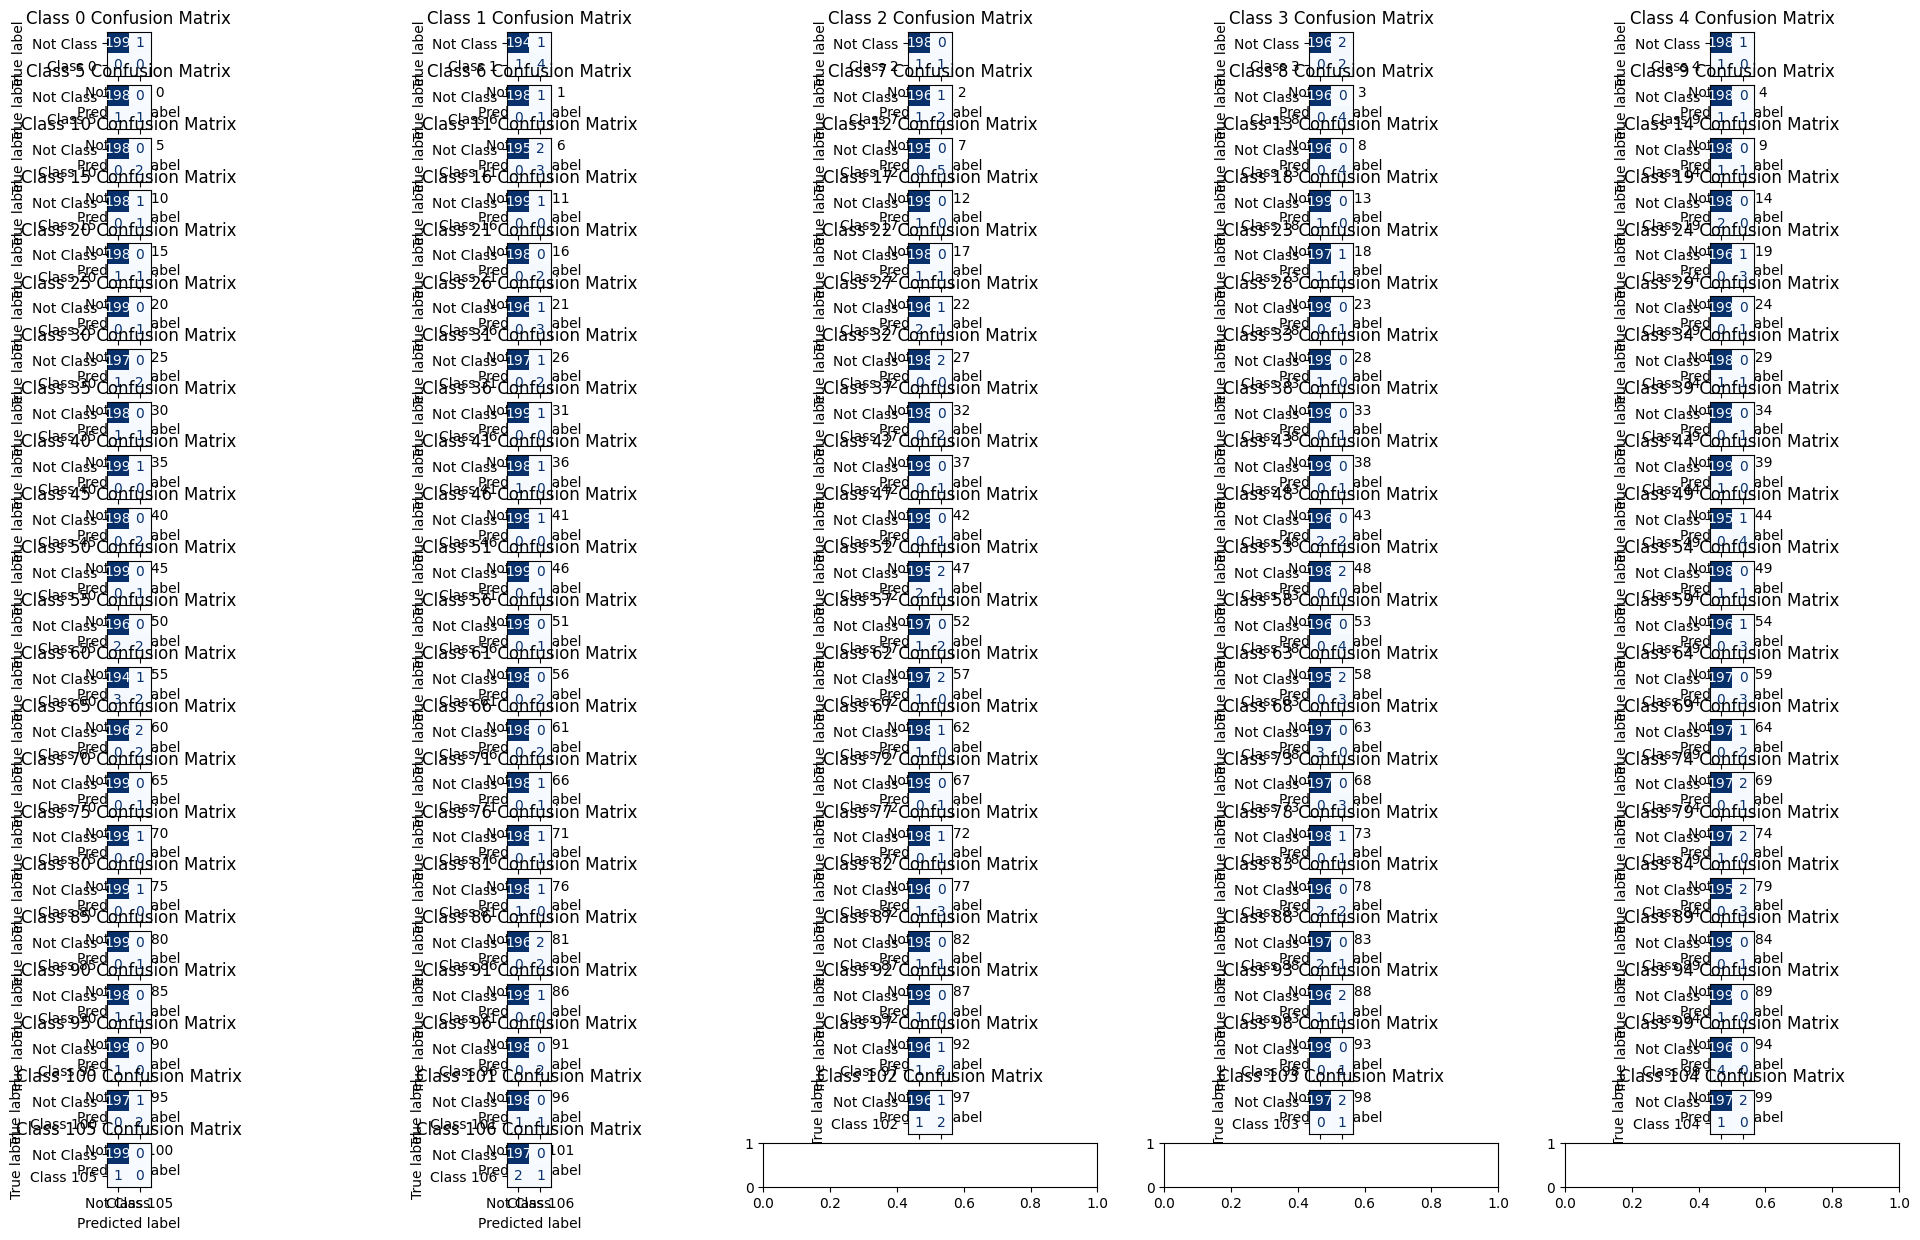

In [195]:
conf_matrix = multilabel_confusion_matrix(y_true=y_valid, y_pred=y_pred)
n_matrices = len(conf_matrix)
fig, axes = plt.subplots(ncols=min(5, n_matrices), nrows=(n_matrices + 4) // 5, figsize=(25, 15))
count = 0
axes = axes.ravel()
for i, cm in enumerate(conf_matrix):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Class", f"Class {i}"])
    disp.plot(cmap=plt.cm.Blues, ax=axes[i], colorbar=False)
    axes[i].set_title(f"Class {i} Confusion Matrix")

plt.tight_layout()
plt.show()

## Save models and reload

In [205]:
# Create a function to save a model
def save_model(model, suffix=None):
    '''
    Saves a given model in a models directory and appends a suffix (string)
    '''
    # Create a model directory path name with current time
    modeldir = os.path.join('DogBreed/models', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_path = modeldir + '-'+suffix+'.h5' #.h5 is Save format of model
    print(f'Saving model to : {model_path}...')
    model.save(model_path)
    return model_path

In [208]:
# Create a function to load a trained model
def load_model(model_path):
    '''
    Load a saved model from a specified path.
    '''
    print(f'Loading saved model from: {model_path}')
    model = tf.keras.models.load_model(model_path, 
                                       custom_objects = {'KerasLayer': hub.KerasLayer})
    return model

In [200]:
# Save our model trained on 1000 images 
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to : DogBreed/models/20250216-195312-1000-images-mobilenetv2-Adam.h5...


/Users/nareshdhami/Desktop/Visual Code/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'DogBreed/models/20250216-195312-1000-images-mobilenetv2-Adam.h5'

In [209]:
# Load trained model
loaded_1000_model = load_model('DogBreed/models/20250216-195312-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: DogBreed/models/20250216-195312-1000-images-mobilenetv2-Adam.h5


In [203]:
# Evaluate the pre-saved model
model.evaluate(valid_batches)

7/7 [==============================] - 1s 105ms/step - loss: 1.2405 - accuracy: 0.6900


[1.240466594696045, 0.6899999976158142]

In [204]:
# Evaluate the loaded model
loaded_1000_model.evaluate(valid_batches)

7/7 [==============================] - 1s 133ms/step - loss: 1.2405 - accuracy: 0.6900


[1.240466594696045, 0.6899999976158142]

## Training model in Full Dataset

In [211]:
len(X), len(y)

(10222, 10222)

In [212]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

In [213]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [214]:
# Create a model for full model
full_model = build_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [215]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on full data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                                             patience=3)

In [216]:
# Fit the full model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100


2025-02-16 20:24:19.111168: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


320/320 [==============================] - 39s 117ms/step - loss: 1.3296 - accuracy: 0.6704
Epoch 2/100
320/320 [==============================] - 37s 117ms/step - loss: 0.4004 - accuracy: 0.8815
Epoch 3/100
320/320 [==============================] - 37s 117ms/step - loss: 0.2358 - accuracy: 0.9347
Epoch 4/100
320/320 [==============================] - 38s 117ms/step - loss: 0.1551 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 38s 117ms/step - loss: 0.1073 - accuracy: 0.9795
Epoch 6/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0776 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 43s 136ms/step - loss: 0.0589 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 48s 151ms/step - loss: 0.0453 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 47s 147ms/step - loss: 0.0388 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 46s 145ms/step - los

In [217]:
# Save full data model
save_model(model=full_model, suffix='full-image-set-mobilenetv2-Adam')

Saving model to : DogBreed/models/20250216-203947-full-image-set-mobilenetv2-Adam.h5...


/Users/nareshdhami/Desktop/Visual Code/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'DogBreed/models/20250216-203947-full-image-set-mobilenetv2-Adam.h5'

In [218]:
# Load the saved full model
loaded_full_model = load_model('DogBreed/models/20250216-203947-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: DogBreed/models/20250216-203947-full-image-set-mobilenetv2-Adam.h5


## Making predictions on `Test set`
Our datas are trained on batches, so test data also need to be transformed to batches

In [229]:
# Load test image filename 
test_path = 'DogBreed/test/'
test_filename = [test_path+fname for fname in os.listdir(test_path)]
test_filename[:10]

['DogBreed/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 'DogBreed/test/dae9fd18836d8df20989ef0101771d4b.jpg',
 'DogBreed/test/079a40f22b0fad9a66f76797b62bb930.jpg',
 'DogBreed/test/ab8462f9a501d362041d47582fddc9ad.jpg',
 'DogBreed/test/8895089b432e020cc42e6262b5a1c2dd.jpg',
 'DogBreed/test/985ae7fc271ac4a0d131e546c0f95bb6.jpg',
 'DogBreed/test/77c1ab99cffb817d54fb14f229aeb118.jpg',
 'DogBreed/test/ad7e50abca9b7c6a88b63946c5bbe493.jpg',
 'DogBreed/test/d61a09cecf56666cdb315ebce4b93c43.jpg',
 'DogBreed/test/cb120c57904e8c0694bbe259c58a873c.jpg']

In [230]:
len(test_filename)

10357

In [231]:
# Create test data batch
test_data = create_data_batches(test_filename, test_data=True)

In [232]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [233]:
#Make prediction of test data batch using `loaded_full_model`
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=True)

324/324 [==============================] - 38s 116ms/step


## Saving predictions in csv file
* We can save the predicted model in csv file for future use using numpy `np.savetxt('Directory_Path/Filename', Predictions, delimiter=',')`
* We can load this csv file later for further use using `np.loadtxt('Director_Path/Filename', delimiter=',')`

In [236]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt('DogBreed/test_predictions.csv', test_predictions, delimiter=',')

In [237]:
# Load predictions (Numpy array) from saved csv file
loaded_predictions_np = np.loadtxt('DogBreed/test_predictions.csv', delimiter=',')

In [238]:
loaded_predictions_np[:10]

array([[2.60385991e-10, 7.85205793e-06, 4.44924009e-09, ...,
        8.71047996e-06, 1.99464056e-10, 3.61771160e-12],
       [2.75957328e-03, 3.40378872e-04, 2.87614716e-06, ...,
        7.78012236e-07, 2.32268349e-07, 6.45977565e-08],
       [4.32228653e-08, 5.43756082e-11, 3.50219528e-13, ...,
        2.08800018e-13, 3.27289194e-12, 5.17604785e-13],
       ...,
       [3.53816455e-12, 1.00965236e-09, 3.60194957e-10, ...,
        3.72294622e-08, 6.60299523e-11, 6.56796284e-11],
       [6.17447597e-07, 1.08821630e-04, 1.36475109e-09, ...,
        3.35317246e-10, 1.61067969e-12, 1.66788516e-09],
       [3.33553700e-08, 7.82043388e-11, 2.03777328e-10, ...,
        4.44485490e-11, 2.95504710e-09, 7.27527947e-07]])

In [239]:
test_predictions[:10]

array([[2.6038599e-10, 7.8520579e-06, 4.4492401e-09, ..., 8.7104800e-06,
        1.9946406e-10, 3.6177116e-12],
       [2.7595733e-03, 3.4037887e-04, 2.8761472e-06, ..., 7.7801224e-07,
        2.3226835e-07, 6.4597756e-08],
       [4.3222865e-08, 5.4375608e-11, 3.5021953e-13, ..., 2.0880002e-13,
        3.2728919e-12, 5.1760478e-13],
       ...,
       [3.5381646e-12, 1.0096524e-09, 3.6019496e-10, ..., 3.7229462e-08,
        6.6029952e-11, 6.5679628e-11],
       [6.1744760e-07, 1.0882163e-04, 1.3647511e-09, ..., 3.3531725e-10,
        1.6106797e-12, 1.6678852e-09],
       [3.3355370e-08, 7.8204339e-11, 2.0377733e-10, ..., 4.4448549e-11,
        2.9550471e-09, 7.2752795e-07]], dtype=float32)

In [240]:
test_predictions.shape, loaded_predictions_np.shape

((10357, 120), (10357, 120))

## Preparing test datasets for Kaggle submission
Format requires id, and prediction probability for each dog breed.
* Create a DataFrame with ID column as well as a column for each dog breed
* Add data to ID column by extracting the test image ID's from their filepaths
* Add data (the prediction probabilities) to each of the dog breed columns
* Export the DataFrame as a csv to submit it to Kaggle

In [244]:
# Create a panda DataFrame with empty columns
preds_df = pd.DataFrame(columns=['id']+list(unique_breeds))

In [248]:
# Append test image ID's to a predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [250]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9   2.603860e-10  7.852058e-06   
1  dae9fd18836d8df20989ef0101771d4b   2.759573e-03  3.403789e-04   
2  079a40f22b0fad9a66f76797b62bb930   4.322287e-08  5.437561e-11   
3  ab8462f9a501d362041d47582fddc9ad   1.706318e-10  1.350070e-08   
4  8895089b432e020cc42e6262b5a1c2dd   2.251964e-11  1.821649e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.449240e-09  2.366063e-07                    6.091516e-12   
1         2.876147e-06  6.057527e-08                    6.944976e-08   
2         3.502195e-13  1.945390e-11                    2.553160e-11   
3         5.540595e-12  1.554606e-08                    3.156352e-12   
4         1.208999e-08  1.253184e-11                    7.858300e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.735247e-06        2.590166e-12  7.308554e-11  2.996413e-04  ...   
1  2.724650e-08        1.024954e-03  2.030894e-09  7.573559e-09  ...   
2  6.754642e-12        2.799752e-12  4.689310e-12  1.941719e-12  ...   
3  2.303109e-08        1.732611e-09  8.235081e-12  2.493185e-10  ...   
4  3.670455e-09        2.155714e-08  1.514374e-04  5.477666e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.343551e-09  2.463702e-09  2.950145e-05  3.572608e-07  9.654748e-07   
1  4.981950e-08  2.369793e-07  2.580646e-08  5.455369e-05  2.550064e-05   
2  3.966979e-13  3.367290e-13  1.387472e-12  2.156149e-11  4.614059e-11   
3  3.411918e-09  3.173191e-10  5.908757e-11  3.865032e-08  1.659416e-10   
4  6.688680e-10  8.948518e-09  4.934106e-10  1.466063e-11  8.580604e-11   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.052382e-12                 4.616165e-09  8.710480e-06   
1            1.375303e-11                 1.867160e-07  7.780122e-07   
2            1.968571e-13                 2.159484e-13  2.088000e-13   
3            5.492762e-08                 6.670721e-10  1.840137e-11   
4            4.002080e-08                 1.894112e-08  3.147608e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.994641e-10       3.617712e-12  
1             2.322683e-07       6.459776e-08  
2             3.272892e-12       5.176048e-13  
3             1.527937e-13       1.448172e-07  
4             9.880727e-09       7.094462e-12  

[5 rows x 121 columns]

In [253]:
preds_df.to_csv('DogBreed/full_model_predictions_kaggle_submission.csv', index=False)

## Making Predictions on Custom Images
To make predictions on custom images we'll:
* Get the filepaths of our own images
* Turn the filepaths into data bathces using `create_data_batches()`. And since our custom images won't have labels, we have to set `test_data` parameter to `True`
* Pass the custom image data to our model's `predict()` method
* Convert the prediction output probabilities to prediction labels
* Compare the predicted labels to the custom images

In [303]:
# Get custom image filepath
custom_path = 'DogBreed/custom-dogs/'
custom_image_path = [custom_path+fname for fname in os.listdir(custom_path)]
custom_image_path

['DogBreed/custom-dogs/akita-dog.jpg',
 'DogBreed/custom-dogs/1000_F_801540482_lo8YVFnVXjmjsRTOnZvvQMCbEJgNTBAo.jpg',
 'DogBreed/custom-dogs/american-staffordshire-terrier-amstaff-american-staffy.jpg',
 'DogBreed/custom-dogs/alaskan-malamute.jpg',
 'DogBreed/custom-dogs/Dog_Breeds.jpg']

In [304]:
# Turn custom images into data batches
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [305]:
# Make predictions on custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

1/1 [==============================] - 0s 479ms/step


array([[2.12377876e-11, 3.65495308e-12, 2.00416100e-10, 2.89394290e-12,
        5.91092786e-10, 1.68660208e-09, 7.85733024e-12, 1.52536245e-07,
        4.89368311e-13, 5.66304088e-08, 1.04970421e-10, 2.83207736e-14,
        3.69434261e-08, 3.78394072e-09, 2.10305462e-08, 1.58200081e-12,
        1.32726576e-08, 8.65461924e-10, 5.27260759e-08, 4.68269867e-08,
        1.70643165e-12, 2.93717921e-08, 7.27421345e-10, 1.01258877e-08,
        1.54822677e-09, 4.29836255e-09, 7.36039507e-10, 1.79750046e-08,
        7.62137020e-08, 3.30881211e-10, 6.37789332e-09, 2.72135509e-10,
        4.33028613e-11, 2.92382580e-08, 2.79621215e-10, 1.03210528e-12,
        2.04251393e-07, 7.73185049e-04, 1.00864250e-09, 3.26059868e-09,
        2.52420584e-11, 1.93861212e-11, 1.06072244e-08, 6.22392483e-02,
        8.79331590e-12, 1.55063540e-09, 3.28830065e-05, 7.97607379e-12,
        1.19017729e-09, 5.05226261e-09, 6.51844247e-12, 2.77596470e-11,
        1.10697805e-10, 2.80674955e-10, 3.12426813e-08, 7.656341

In [306]:
# Get custom image labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['siberian_husky',
 'tibetan_terrier',
 'american_staffordshire_terrier',
 'eskimo_dog',
 'golden_retriever']

In [307]:
# Get custom images (unbatch_data won't work as this is test datasets)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

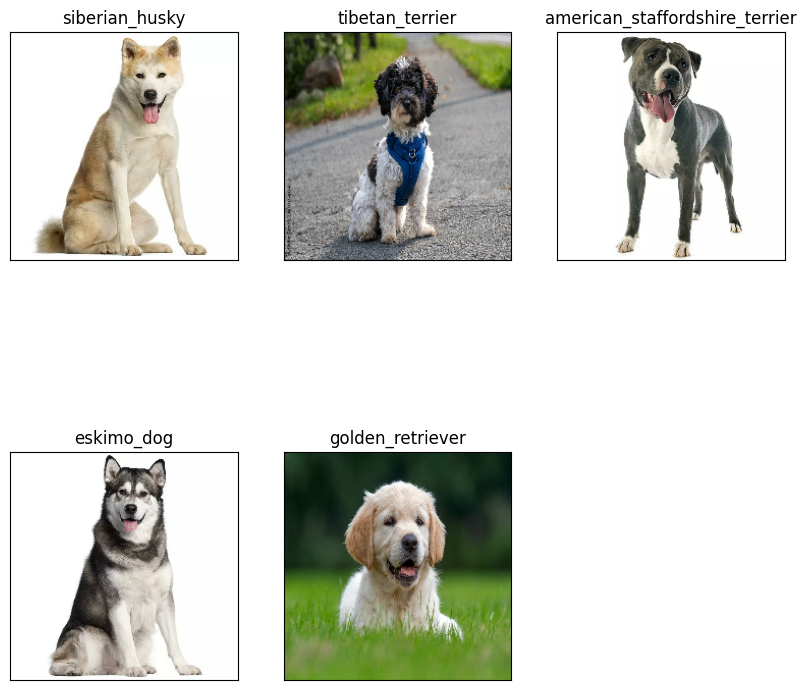

In [309]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)